# Problem formulation
This project is about Wish.com Product Rating Prediction.The data is uncleaned with some missing values which need preprocessing. Our goal is to predict the product ratings given the other features known for a product on Wish.com. Ratings  should in categories from 1 to 5. For one product, the higher the rating is, the more the customers like the product. In this way, when you have a new product to be put on wish.com, you can estimate how likely people will like your product, without actually listing out there. Also, by doing this, it helps us to understand under what certain conditions that a product will be highly rated, as a way to understand the customer base of the wish.com.
We have 1095 training samples and 480 test sample to predict. We have 34 features. the output is the predicted rating  
Data mining function required is classfication.
We have many challenges as data requires many preprocessing due to the existence of dirty data and also we need hyperparameter tuning to find out the best paramter that will reults the best performance 
By predicting the rating wish.com will be able to predict which product will help in improving customer experience and increase their sales. What is an ideal solution?


### Data Loading and Exploration
##### let's load a simple dataframe.
#### Training set

# First trial

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('train_new.csv') #Reading the traing dataset
print(df.shape)
df

(1094, 34)


,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,0,"corset top,Fashion,crop top,camisole,knittop,T...",red,S,50,Livraison standard,1,0,41,50,NaN,NaN,CN,fantastic_tune,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08,1381
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,0,"Blues,Summer,luggagesticker,Bicycle,cute,fresh...",NaN,H01,31,Livraison standard,2,0,35,50,NaN,NaN,CN,zzbllss,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08,212
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,0,"Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...",purple,M,50,Livraison standard,3,0,25,50,NaN,NaN,CN,OIUG 56465,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08,163
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,letter pri...",black,M,50,Livraison standard,2,0,45,50,1.0,Quantité limitée !,CN,yubenqiang,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08,674


In [2]:
#Converting the rating to range from 1 to 5
df=df.loc[df['rating'].isin([1,2,3,4,5])]

In [3]:
_id= df['id']

### Visualizing our data

In [4]:
import numpy as np
#visualizing the numeric columns 
df_numeric = df.select_dtypes(include=np.number)
df_numeric.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'id'],
      dtype='object')

In [5]:
#visualizing the categorical columns
df_cat = df.select_dtypes(include =['object'])
df_cat.columns

Index(['currency_buyer', 'tags', 'product_color', 'product_variation_size_id',
       'shipping_option_name', 'urgency_text', 'origin_country',
       'merchant_title', 'merchant_name', 'merchant_info_subtitle',
       'merchant_id', 'merchant_profile_picture', 'theme', 'crawl_month'],
      dtype='object')

In [6]:
import plotly.express as px
fig = px.imshow(df_numeric.corr())
fig.show()

## Handling the missing values

In [7]:
# First, lets drop duplicates (if any)
df= df.drop_duplicates()

In [8]:
#Checking the count of NaN values in al the columns
df.duplicated().sum()
df.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              744
urgency_text                    744
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             

#### From our observation 
we will find out that columns product_color, product_variation_size_id, has_urgency_banner, urgency_text, origin_country and merchant_profile_picture have many missing values that should be preprocessed


In [9]:
Country = df.loc[:, 'origin_country']
Country

0       CN
1       CN
2       CN
3       CN
4       CN
        ..
1089    CN
1090    CN
1091    CN
1092    CN
1093    CN
Name: origin_country, Length: 1093, dtype: object

In [10]:
#Filling the Nan values with the most frequent value which is CN
df.loc[:, 'origin_country']=Country.fillna('CN')


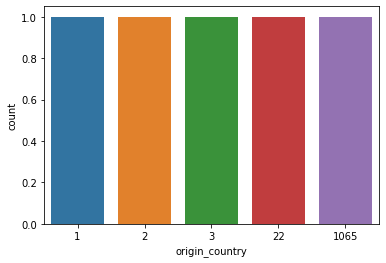

In [11]:
#plotting the values of origin_country
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=Country.value_counts())

In [12]:
Urgency = df.loc[:,'has_urgency_banner']
Urgency

0       NaN
1       NaN
2       NaN
3       NaN
4       1.0
       ... 
1089    NaN
1090    NaN
1091    NaN
1092    1.0
1093    1.0
Name: has_urgency_banner, Length: 1093, dtype: float64

In [13]:
#Filling the Nan values with zero which express that there was no urgency or troubles with this transaction
df.loc[:, 'has_urgency_banner']=Urgency.fillna(0)

In [14]:
#Checking urgent text 
df['urgency_text'].value_counts()

Quantité limitée !                  348
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [15]:
# handling urgency_text column
df['urgency_text'] = df['urgency_text'].replace({
    'Quantité limitée !' : 'Limited Quantity', 
    'Réduction sur les achats en gros': 'Wholesale discount', 
    np.nan: 'None'
})

### Product Size column


In [16]:
#Geting the number of existence of each value in product_variation_size_id column
pd.options.display.max_rows = 100
df['product_variation_size_id'].value_counts()

S                               444
XS                              248
M                               135
XXS                              76
L                                29
S.                               13
XL                               12
XXL                              11
XXXS                              5
M.                                4
Size-XS                           4
Size S                            4
4XL                               4
XS.                               4
Size-S                            3
2XL                               3
10 ml                             3
s                                 3
Size M                            2
35                                2
Size4XL                           2
Size -XXS                         2
SizeL                             2
25                                2
SIZE XS                           2
29                                2
S Pink                            2
33                          

From our observation we will find out a great variation between our values and alot of values with the same meaning but written in different way in our datasetthat shpuld be handled 

In [17]:
#Gathering all the value with the same meaning and replacing its name with its actual name
df['product_variation_size_id'].replace(['S', 'S.', 's', 'Size S', 'Size-S', 'Size S.', 'Suit-S', 'size S','S Pink', 'pants-S', 'US-S', 'SIZE S', 'S (waist58-62cm)', 'Size--S', '25-S', 'Size/S', 'S Diameter 30cm', 'S..', 'S(Pink & Black)'], 'S', inplace=True)
df['product_variation_size_id'].replace(['XS', 'XS.', 'SIZE XS', 'Size-XS'], 'XS', inplace=True)
df['product_variation_size_id'].replace(['XXS', 'XXXS', 'SIZE-XXS', 'Size -XXS', 'Size XXS', 'Size-XXS', 'SIZE XXS'], 'XXS+', inplace=True)
df['product_variation_size_id'].replace(['M', 'M.', 'Size M'], 'M', inplace=True)
df['product_variation_size_id'].replace(['L', 'SizeL', '32/L', 'L.', 'Size-L'], 'L', inplace=True)
df['product_variation_size_id'].replace(['XL', '2XL', '1 PC - XL', 'X   L'], 'XL', inplace=True)
df['product_variation_size_id'].replace(['XXL', '4XL', '2XL', 'Size4XL', '3XL', 'XXXXXL', '1 PC - XL', 'SIZE-4XL', '04-3XL', 'Size-5XL', 'XXXXL', '5XL', 'XXXL'], 'XXL+', inplace=True)
size_val_counts = df['product_variation_size_id'].value_counts()
# Select the values where the count is less than 5 and Nans and puting them under category other
minority = size_val_counts[size_val_counts <= 5].index
df.loc[df['product_variation_size_id'].isin(minority), 'product_variation_size_id'] = "Other"
df['product_variation_size_id'] = df['product_variation_size_id'].replace(np.nan, "Other")

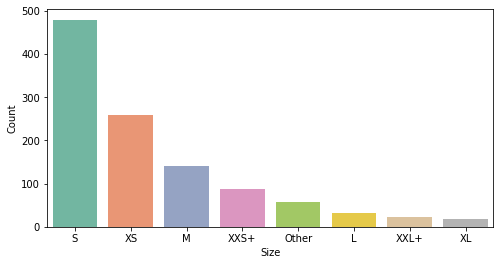

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
#ploting size column after handling it
plt.figure(figsize=(8, 4))
ax = sns.countplot(x = 'product_variation_size_id',
                   order = df['product_variation_size_id'].value_counts().index,
                   palette= "Set2",
                   data=df)
ax.set(xlabel='Size', ylabel='Count')

plt.show()

### Product Color column

In [19]:
#Getting the unique values 
colors = df['product_color'].unique()

In [20]:
# convert to lower case
df['product_color'] = df['product_color'].str.lower()
# remove trailing white spaces
df['product_color'] = df['product_color'].str.strip()
df['product_color'].head(20)

0       yellow
1        black
2        white
3     lakeblue
4      apricot
5        black
6        white
7        brown
8      winered
9         blue
10         red
11       white
12    navyblue
13       black
14      yellow
15       green
16      yellow
17       khaki
18       green
19       white
Name: product_color, dtype: object

In [21]:
#Geting the number of existence of each value in product_color column
df['product_color'].value_counts()

black               222
white               176
blue                 78
yellow               69
pink                 69
red                  62
green                61
grey                 48
purple               37
armygreen            22
winered              19
navyblue             18
orange               16
multicolor           14
khaki                10
white & green         8
lightblue             8
gray                  6
skyblue               6
coffee                6
rosered               5
beige                 5
brown                 5
rose                  4
lightpink             4
darkblue              4
navy                  3
black & white         3
black & green         3
army green            2
fluorescentgreen      2
floral                2
dustypink             2
applegreen            2
lightgreen            2
coolblack             2
orange-red            2
burgundy              2
white & black         2
lightred              2
black & blue          2
leopard         

In [22]:
#Defing a dictionary with all the colors in our dataset and its corresponing color that it belongs to
color_Switch = {
'Black' : 'black',
'coolblack': 'black',
'White': 'white',
'offwhite': 'white', 
'bluue': 'blue',
'prussianblue': 'blue',
'navyblue': 'blue', 
'navy blue': 'blue',
'lightblue': 'blue',
'skyblue': 'blue',
'darkblue': 'blue',
'navy' : 'blue',
'bluee': 'blue',
'bluue': 'blue',
'denimblue': 'blue', 
'lakeblue': 'blue', 
'Blue': 'blue',
'gold': 'yellow',
'lightyellow': 'yellow',
'winered': 'red',
'rosered': 'red',
'watermelonred': 'red',
'RED': 'red',
'winered': 'red',
'wine red': 'red',
'rose': 'red',
'orange-red': 'red',
'Rose red': 'red',
'wine': 'red',
'coralred': 'red',
'burgundy': 'red', 
'lightred': 'red', 
'lightpink': 'pink',
'Pink': 'pink',
'dustypink': 'pink',
'armygreen':'green',
'khaki': 'green',
'lightgreen': 'green',
'fluorescentgreen': 'green',
'army green': 'green',
'applegreen': 'green',
'Army green': 'green',
'mintgreen': 'green',
'army': 'green', 
'lightkhaki': 'green', 
'darkgreen': 'green', 
'light green': 'green', 
'lightkhaki': 'green', 
'lightgray': 'grey', 
'apricot': 'orange',
'violet': 'purple',
'lightpurple': 'purple', 
'gray': 'grey',
'silver': 'grey',
'coffee': 'brown', 
'blackwhite': 'dual', 
 np.nan: 'other'}

In [23]:
#matching each color to its corresponding color category and the rest to others
def switch(color): 
    if color in color_Switch: 
        return color_Switch[color]
    elif color in color_Switch.values(): 
        return color
    elif '&' in color: 
        return 'dual'
    else:
        return 'other'
df['product_color'] = df.product_color.apply(switch)

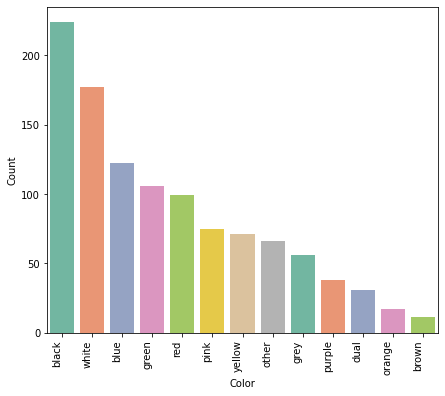

In [24]:
#Plotting the data after handling it
plt.figure(figsize=(7, 6))
ax = sns.countplot(x = 'product_color',
                   order = df['product_color'].value_counts().index,
                   palette= "Set2",
                   data=df)
ax.set(xlabel='Color', ylabel='Count')
plt.xticks(rotation=90, ha='right')
plt.show()

## Removing unuseful data columns

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1093 non-null   float64
 1   retail_price                  1093 non-null   int64  
 2   currency_buyer                1093 non-null   object 
 3   units_sold                    1093 non-null   int64  
 4   uses_ad_boosts                1093 non-null   int64  
 5   rating                        1093 non-null   float64
 6   rating_count                  1093 non-null   int64  
 7   badges_count                  1093 non-null   int64  
 8   badge_local_product           1093 non-null   int64  
 9   badge_product_quality         1093 non-null   int64  
 10  badge_fast_shipping           1093 non-null   int64  
 11  tags                          1093 non-null   object 
 12  product_color                 1093 non-null   object 
 13  pro

In [27]:
#Inscpecting merchant_profile_picture column
df['merchant_profile_picture'].value_counts()



https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5acaf29d5ebcfd72403106a8.jpg    8
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55c8a4c33a698c6010edcd9e.jpg    6
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5533c83986ff95173dc017d0.jpg    6
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_58ad449708de0c6dc59d9e06.jpg    5
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_577fb2b368116418674befd9.jpg    4
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55c8029641d799421d41fe3a.jpg    4
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_57c306d73a698c06f98ed450.jpg    4
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_54db03867851097093c0efe7.jpg    4
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5268759b736046671957190c.jpg    4
https://s3-us-west-1.amazonaws.com/sweeper-production-m

As conclusion we will find out that merchant profile picture doesn't add any useful information 

#### Inspect each columns
merchant_profile_picture, theme, crawl_month, tags, shipping_option_name, merchant_title, merchant_name, merchant_info_subtitle, currency_buyer, merchant_id



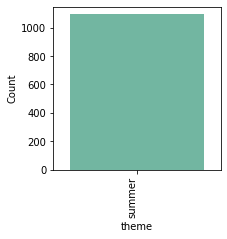

In [28]:
#incpecting theme coloumn
plt.figure(figsize=(3, 3))
ax = sns.countplot(x = 'theme',
                   order = df['theme'].value_counts().index,
                   palette= "Set2",
                   data=df)
ax.set(xlabel='theme', ylabel='Count')
plt.xticks(rotation=90, ha='right')
plt.show()

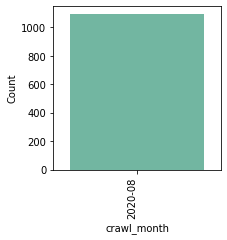

In [29]:
#inspecting Crawl month column
plt.figure(figsize=(3, 3))
ax = sns.countplot(x = 'crawl_month',
                   order = df['crawl_month'].value_counts().index,
                   palette= "Set2",
                   data=df)
ax.set(xlabel='crawl_month', ylabel='Count')
plt.xticks(rotation=90, ha='right')
plt.show()

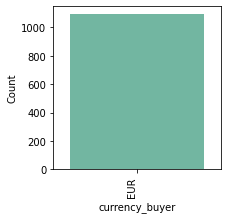

In [30]:
#inspecting currency buyer column
plt.figure(figsize=(3, 3))
ax = sns.countplot(x = 'currency_buyer',
                   order = df['currency_buyer'].value_counts().index,
                   palette= "Set2",
                   data=df)
ax.set(xlabel='currency_buyer', ylabel='Count')
plt.xticks(rotation=90, ha='right')
plt.show()

Based on our observation we can see that these columns (currency_buyer,crawl_month, theme) have only one unique columns so there existence doesnt ad any useful information 

In [31]:
df['shipping_option_name'].value_counts()

Livraison standard         1047
Standard Shipping            16
Envio Padrão                  6
الشحن القياسي                 4
Expediere Standard            4
Envío normal                  3
Standardversand               3
Standardowa wysyłka           2
Standart Gönderi              2
Livraison Express             2
Стандартная доставка          2
Spedizione standard           1
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: shipping_option_name, dtype: int64

As we can see in column shipping_option_name that it has very low variance as more than 95% of the values in the column belong to a specific category so we can drop this column.

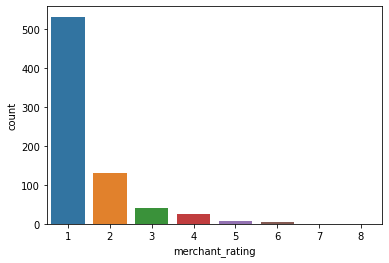

In [32]:
sns.countplot(x=df['merchant_rating'].value_counts())

In [33]:
sns.countplot(x=df1['merchant_title'].value_counts())

The columns merchant_title, merchant_name, merchant_info_subtitle, merchant_id gives the same information 

In [34]:
#Droping unuseful data
df.drop('tags',axis='columns', inplace=True)
df.drop('shipping_option_name',axis='columns', inplace=True)
df.drop('merchant_title',axis='columns', inplace=True)
df.drop('merchant_name',axis='columns', inplace=True)
df.drop('merchant_info_subtitle',axis='columns', inplace=True)
df.drop('merchant_profile_picture',axis='columns', inplace=True)
df.drop('urgency_text',axis='columns', inplace=True)
df.drop('currency_buyer',axis='columns', inplace=True)
df.drop('merchant_id',axis='columns',inplace=True)
df.drop('crawl_month',axis='columns', inplace=True)
df.drop('theme',axis='columns', inplace=True)
df.drop('id',axis='columns', inplace=True)


In [36]:
#Making sure there is no more missing values
missing_values_count = df.isnull().sum()

# look at the # of missing points in all columns
missing_values_count[:]

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
origin_country                  0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64

## One-Hot encoding

In [37]:
#One_hot encoding for categorical data
df = pd.get_dummies(df, columns = ['product_variation_size_id','product_color','origin_country'])

In [38]:
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,product_variation_size_id_L,product_variation_size_id_M,product_variation_size_id_Other,product_variation_size_id_S,product_variation_size_id_XL,product_variation_size_id_XS,product_variation_size_id_XXL+,product_variation_size_id_XXS+,product_color_black,product_color_blue,product_color_brown,product_color_dual,product_color_green,product_color_grey,product_color_orange,product_color_other,product_color_pink,product_color_purple,product_color_red,product_color_white,product_color_yellow,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1.093000e+03,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,8.283568,23.695334,4522.704483,0.432754,4.004575,916.355901,0.113449,0.019213,0.083257,0.010979,32.835316,2.335773,0.001830,40.483989,49.892955,0.319305,2.678107e+04,4.036020,0.155535,0.028362,0.129003,0.053065,0.438243,0.015554,0.236048,0.020128,0.079597,0.204941,0.111619,0.010064,0.028362,0.096981,0.051235,0.015554,0.060384,0.068618,0.034767,0.090576,0.161940,0.064959,0.974382,0.000915,0.001830,0.020128,0.002745
std,3.836460,31.812401,9829.196136,0.495684,0.582857,2038.307907,0.347588,0.137336,0.276397,0.104251,21.444202,1.003552,0.042757,20.205469,2.015161,0.466421,8.620109e+04,0.200409,0.362580,0.166082,0.335356,0.224266,0.496399,0.123797,0.424846,0.140503,0.270793,0.403843,0.315042,0.099859,0.166082,0.296067,0.220578,0.123797,0.238306,0.252920,0.183272,0.287137,0.368564,0.246566,0.158064,0.030248,0.042757,0.140503,0.052342
min,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,0.000000,4.000000e+00,2.941176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,0.000000,1.926000e+03,3.918367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,144.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,0.000000,8.225000e+03,4.045170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,846.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.000000,2.276500e+04,4.166509,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,27.000000,2

In [39]:
#Defining the labels and the features of our train dataset 
Xtr=df.loc[:,df.columns!='rating']
Ytr = df.rating

In [40]:
from sklearn.preprocessing import MinMaxScaler
#Scaling 
scaler = MinMaxScaler()
Xtr = scaler.fit_transform(Xtr)

## Decision Tree

In [41]:
from sklearn.model_selection import GridSearchCV #importing GidSearchCv
from sklearn import tree #importing tree 
from sklearn.tree import DecisionTreeClassifier #importing DecisionTreeClassifier
#Using gridsearch to find the best parameters
param_grid = {'criterion' :['gini', 'entropy'],
              'max_depth' : [2,4,6,7,8,10,12,14,16]
             }
clf = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(Xtr, Ytr)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 7, 8, 10, 12, 14, 16]},
             verbose=True)

In [42]:
print(grid_search.best_params_, '\n' , grid_search.best_estimator_, '\n The best score is :', grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 6} 
 DecisionTreeClassifier(max_depth=6, random_state=1024) 
 The best score is : 0.781299484730426


As conclusion  we can see that best parameters are 'criterion': 'gini', 'max_depth': 6

In [43]:
#Building a decison tree model using these parameters
clf = DecisionTreeClassifier(criterion="gini", max_depth=6, random_state=1024)
clf.fit(Xtr,Ytr) #Fitting the model with our samples of the train dataset

DecisionTreeClassifier(max_depth=6, random_state=1024)

## Naiive Bayes 

In [44]:
#Building a naive bayes 
from sklearn.naive_bayes import ComplementNB
gnb = ComplementNB()
gnb.fit(Xtr,Ytr)

ComplementNB()

## Support vector model

In [45]:
#Building Svm model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', gamma=0.001, C=10)
svm.fit(Xtr,Ytr)

SVC(C=10, gamma=0.001, kernel='linear')

# Test

#### Now we will repeat all the preprocessing we made on the train dataset on the test dataset

In [46]:
#Reading the test dataset
df1 = pd.read_csv('test_new.csv')

In [47]:
#Defining _id that hold the values of the Ids
_id= df1['id']

In [48]:
df1['urgency_text'] = df1['urgency_text'].replace({
    'Quantité limitée !' : 'Limited Quantity', 
    'Réduction sur les achats en gros': 'Wholesale discount', 
    np.nan: 'None'
})

In [49]:
#Droping unuseful data
df1.drop('tags',axis='columns', inplace=True)
df1.drop('shipping_option_name',axis='columns', inplace=True)
df1.drop('merchant_title',axis='columns', inplace=True)
df1.drop('merchant_name',axis='columns', inplace=True)
df1.drop('merchant_info_subtitle',axis='columns', inplace=True)
df1.drop('merchant_profile_picture',axis='columns', inplace=True)
df1.drop('urgency_text',axis='columns', inplace=True)
df1.drop('currency_buyer',axis='columns', inplace=True)
df1.drop('merchant_id',axis='columns',inplace=True)
df1.drop('crawl_month',axis='columns', inplace=True)
df1.drop('theme',axis='columns', inplace=True)
df1.drop('id',axis='columns', inplace=True)





In [50]:
#Filling the Nan values with the most frequent value which is CN
df1.loc[:, 'origin_country']=Country.fillna('CN')


In [51]:
Urgency = df1.loc[:,'has_urgency_banner']
Urgency

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
474    NaN
475    NaN
476    1.0
477    1.0
478    1.0
Name: has_urgency_banner, Length: 479, dtype: float64

In [52]:
#Filling the Nan values with zero which express that there was no urgency or troubles with this transaction
df1.loc[:, 'has_urgency_banner']=Urgency.fillna(0)

### Product Size column


In [53]:
#Gathering all the value with the same meaning and replacing its name with its actual name
df1['product_variation_size_id'].replace(['S', 'S.', 's', 'Size S', 'Size-S', 'Size S.', 'Suit-S', 'size S','S Pink', 'pants-S', 'US-S', 'SIZE S', 'S (waist58-62cm)', 'Size--S', '25-S', 'Size/S', 'S Diameter 30cm', 'S..', 'S(Pink & Black)'], 'S', inplace=True)
df1['product_variation_size_id'].replace(['XS', 'XS.', 'SIZE XS', 'Size-XS'], 'XS', inplace=True)
df1['product_variation_size_id'].replace(['XXS', 'XXXS', 'SIZE-XXS', 'Size -XXS', 'Size XXS', 'Size-XXS', 'SIZE XXS'], 'XXS+', inplace=True)
df1['product_variation_size_id'].replace(['M', 'M.', 'Size M'], 'M', inplace=True)
df1['product_variation_size_id'].replace(['L', 'SizeL', '32/L', 'L.', 'Size-L'], 'L', inplace=True)
df1['product_variation_size_id'].replace(['XL', '2XL', '1 PC - XL', 'X   L'], 'XL', inplace=True)
df1['product_variation_size_id'].replace(['XXL', '4XL', '2XL', 'Size4XL', '3XL', 'XXXXXL', '1 PC - XL', 'SIZE-4XL', '04-3XL', 'Size-5XL', 'XXXXL', '5XL', 'XXXL'], 'XXL+', inplace=True)
size_val_counts = df1['product_variation_size_id'].value_counts()
# Select the values where the count is less than 5 and Nans and puting them under category other
minority = size_val_counts[size_val_counts <= 5].index
df1.loc[df1['product_variation_size_id'].isin(minority), 'product_variation_size_id'] = "Other"
df1['product_variation_size_id'] = df1['product_variation_size_id'].replace(np.nan, "Other")

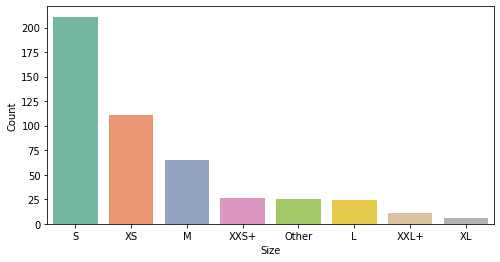

In [54]:
#ploting size column after handling it
plt.figure(figsize=(8, 4))
ax = sns.countplot(x = 'product_variation_size_id',
                   order = df1['product_variation_size_id'].value_counts().index,
                   palette= "Set2",
                   data=df1)
ax.set(xlabel='Size', ylabel='Count')

plt.show()

### Product Color column

In [55]:
#Fixing the colors column
df1['product_color'] = df1.product_color.apply(switch)


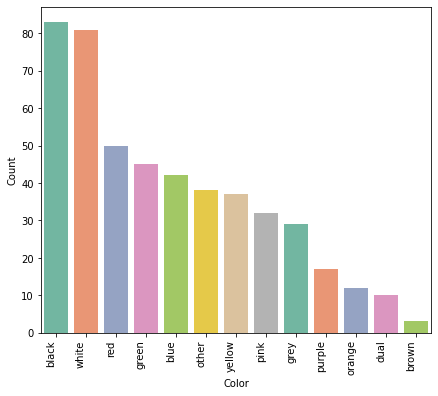

In [56]:
plt.figure(figsize=(7, 6))
ax = sns.countplot(x = 'product_color',
                   order = df1['product_color'].value_counts().index,
                   palette= "Set2",
                   data=df1)
ax.set(xlabel='Color', ylabel='Count')
plt.xticks(rotation=90, ha='right')
plt.show()

## One-Hot Encoding

In [58]:
#One_hot encoding for categorical data
df1 = pd.get_dummies(df1, columns = ['product_variation_size_id','product_color','origin_country'])

In [59]:
df1.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'merchant_rating_count',
       'merchant_rating', 'merchant_has_profile_picture',
       'product_variation_size_id_L', 'product_variation_size_id_M',
       'product_variation_size_id_Other', 'product_variation_size_id_S',
       'product_variation_size_id_XL', 'product_variation_size_id_XS',
       'product_variation_size_id_XXL+', 'product_variation_size_id_XXS+',
       'product_color_black', 'product_color_blue', 'product_color_brown',
       'product_color_dual', 'product_color_green', 'product_color_grey',
       'product_color_orange', 'product_color_other', 'product_color_pink',
       'product_color_purple', 'product_color_red', 'product_colo

In [61]:
Xts=df1.loc[:]
 
Xts.shape

(479, 44)

In [62]:
#Scaling 
Xts = scaler.fit_transform(Xts)

In [63]:
#Predicting using decision tree model
prediction = clf.predict(Xts)
print(prediction)

[1. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 5. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 3. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4.
 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 3. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 3. 5. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 1.

In [64]:
#predicting using naive model
prediction1 = gnb.predict(Xts)
print(prediction1)

[3. 5. 3. 4. 4. 4. 3. 4. 4. 4. 4. 4. 3. 4. 5. 4. 5. 4. 3. 4. 4. 4. 5. 3.
 4. 3. 4. 5. 4. 4. 4. 4. 3. 4. 5. 4. 4. 4. 5. 3. 5. 4. 4. 4. 4. 3. 4. 3.
 3. 4. 4. 5. 2. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 3. 4. 4. 3. 4. 4. 3. 4.
 3. 4. 4. 2. 4. 4. 4. 4. 3. 5. 4. 4. 3. 3. 4. 4. 4. 5. 5. 4. 3. 4. 5. 5.
 3. 5. 5. 4. 4. 4. 4. 4. 3. 3. 3. 4. 3. 4. 3. 3. 4. 5. 2. 5. 5. 3. 5. 4.
 2. 4. 4. 4. 4. 5. 4. 4. 4. 4. 3. 4. 4. 5. 5. 4. 4. 4. 5. 4. 4. 4. 4. 5.
 5. 4. 4. 4. 3. 4. 4. 3. 4. 4. 3. 4. 3. 4. 3. 4. 4. 5. 4. 5. 4. 4. 4. 3.
 5. 5. 4. 4. 5. 4. 4. 3. 5. 4. 4. 4. 5. 4. 4. 4. 4. 3. 4. 5. 4. 3. 4. 3.
 4. 4. 4. 5. 4. 3. 3. 4. 4. 5. 4. 4. 4. 4. 4. 5. 5. 4. 5. 2. 4. 5. 5. 4.
 4. 3. 4. 3. 5. 4. 4. 4. 5. 4. 5. 4. 5. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4.
 5. 3. 3. 5. 4. 5. 3. 3. 3. 3. 3. 5. 3. 3. 5. 5. 4. 2. 4. 3. 5. 4. 4. 4.
 4. 4. 4. 5. 3. 5. 4. 4. 5. 3. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 5. 4. 3.
 4. 4. 4. 5. 4. 5. 4. 3. 4. 4. 4. 5. 3. 4. 3. 4. 4. 5. 4. 5. 4. 4. 3. 4.
 4. 3. 3. 3. 5. 3. 4. 4. 4. 4. 3. 3. 5. 4. 5. 3. 5.

In [65]:
#Predicting using Svm model
prediction2 = svm.predict(Xts)
print(prediction2)

[1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5.
 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 5. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.

In [66]:
#saving the prediction in the file
pred_df = pd.DataFrame(data={'id': _id, 'rating': prediction})

pred_df.to_csv('pred_walkthroughT.csv', index=False)

In [67]:
#saving the prediction in the file
pred_df = pd.DataFrame(data={'id': _id, 'rating': prediction1})

pred_df.to_csv('pred_walkthroughN.csv', index=False)

In [68]:
#saving the prediction in the file
pred_df = pd.DataFrame(data={'id': _id, 'rating': prediction2})

pred_df.to_csv('pred_walkthroughS.csv', index=False)

###### The F1 score is 0.77824 for decision tree ,  0.77405 for svm  and 0.61506 for naive from our observation that we need to add more features to improve the performance of our model and that naiive bayes cannot preform well at all in our case ☹

# Second 2nd Trial

Now we will try to add features and try different models (Decision tree, Svm)

# Train dataset

###### We can get more information from price and retail price expecting percent discount calculated from these two variable has a positive correlation with the number of unit solds.

In [69]:
#Reading the train dataset
df = pd.read_csv('train_new.csv')

In [70]:
#Letting the rates in range between 1 to 5
df=df.loc[df['rating'].isin([1,2,3,4,5])]

In [71]:
#Checking more details about our data
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,349.0,1.093000e+03,1093.000000,1093.000000,1093.000000
mean,8.283568,23.695334,4522.704483,0.432754,4.004575,916.355901,0.113449,0.019213,0.083257,0.010979,32.835316,2.335773,0.001830,40.483989,49.892955,1.0,2.678107e+04,4.036020,0.155535,772.806038
std,3.836460,31.812401,9829.196136,0.495684,0.582857,2038.307907,0.347588,0.137336,0.276397,0.104251,21.444202,1.003552,0.042757,20.205469,2.015161,0.0,8.620109e+04,0.200409,0.362580,453.559910
min,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,1.0,4.000000e+00,2.941176,0.000000,2.000000
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.926000e+03,3.918367,0.000000,383.000000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,144.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,8.225000e+03,4.045170,0.000000,753.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,846.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.276500e+04,4.166509,0.000000,1167.000000
max,27.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,7.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,4.577519,1.000000,1572.000000


In [72]:
missing_values_count = df.isnull().sum()

# look at the # of missing points in all the coloumns
missing_values_count[:]

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              744
urgency_text                    744
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             

In [73]:
#droping the unnessary column
df.drop('tags',axis='columns', inplace=True)
df.drop('shipping_option_name',axis='columns', inplace=True)
df.drop('merchant_title',axis='columns', inplace=True)
df.drop('merchant_name',axis='columns', inplace=True)
df.drop('merchant_info_subtitle',axis='columns', inplace=True)
df.drop('merchant_profile_picture',axis='columns', inplace=True)
df.drop('urgency_text',axis='columns', inplace=True)
df.drop('currency_buyer',axis='columns', inplace=True)
df.drop('merchant_id',axis='columns',inplace=True)
df.drop('crawl_month',axis='columns', inplace=True)
df.drop('theme',axis='columns', inplace=True)
df.drop('id',axis='columns', inplace=True)

In [74]:

subset_df_data = df.loc[:, 'origin_country']
subset_df_data

0       CN
1       CN
2       CN
3       CN
4       CN
        ..
1089    CN
1090    CN
1091    CN
1092    CN
1093    CN
Name: origin_country, Length: 1093, dtype: object

In [75]:
#filling the missing values in origin_country columns
df.loc[:, 'origin_country']=subset_df_data.fillna('CN')

In [76]:
#Filling the missing values in urgency banner column
subset_df_data1 = df.loc[:,'has_urgency_banner']
df.loc[:,'has_urgency_banner']=subset_df_data1.fillna(0)

In [77]:
#replacing the size valus with its corresponding size category
df['product_variation_size_id'].replace(['S', 'S.', 's', 'Size S', 'Size-S', 'Size S.', 'Suit-S', 'size S','S Pink', 'pants-S', 'US-S', 'SIZE S', 'S (waist58-62cm)', 'Size--S', '25-S', 'Size/S', 'S Diameter 30cm', 'S..', 'S(Pink & Black)'], 'S', inplace=True)
df['product_variation_size_id'].replace(['XS', 'XS.', 'SIZE XS', 'Size-XS'], 'XS', inplace=True)
df['product_variation_size_id'].replace(['XXS', 'XXXS', 'SIZE-XXS', 'Size -XXS', 'Size XXS', 'Size-XXS', 'SIZE XXS'], 'XXS+', inplace=True)
df['product_variation_size_id'].replace(['M', 'M.', 'Size M'], 'M', inplace=True)
df['product_variation_size_id'].replace(['L', 'SizeL', '32/L', 'L.', 'Size-L'], 'L', inplace=True)
df['product_variation_size_id'].replace(['XL', '2XL', '1 PC - XL', 'X   L'], 'XL', inplace=True)
df['product_variation_size_id'].replace(['XXL', '4XL', '2XL', 'Size4XL', '3XL', 'XXXXXL', '1 PC - XL', 'SIZE-4XL', '04-3XL', 'Size-5XL', 'XXXXL', '5XL', 'XXXL'], 'XXL+', inplace=True)
size_val_counts = df['product_variation_size_id'].value_counts()
# Select the values where the count is less than 5 
minority = size_val_counts[size_val_counts <= 5].index
df.loc[df['product_variation_size_id'].isin(minority), 'product_variation_size_id'] = "Other"
df['product_variation_size_id'] = df['product_variation_size_id'].replace(np.nan, "Other")

In [78]:
#checking the unique values or colors column
colors = df['product_color'].unique()
colors

array(['yellow', 'black', 'white', 'lakeblue', 'apricot', 'brown',
       'winered', 'blue', 'red', 'navyblue', 'green', 'khaki', 'White',
       'white & green', 'multicolor', 'lightpink', 'pink', 'RED',
       'armygreen', 'lightblue', nan, 'coffee', 'grey', 'skyblue',
       'watermelonred', 'pink & black', 'whitefloral', 'purple', 'navy',
       'pink & white', 'rosered', 'orange', 'Black', 'mintgreen',
       'leopardprint', 'gray', 'navy blue', 'star', 'rose', 'lightyellow',
       'camouflage', 'black & yellow', 'whitestripe', 'navyblue & white',
       'black & blue', 'lightred', 'violet', 'gold', 'black & green',
       'white & black', 'burgundy', 'black & white', 'lightgrey',
       'coolblack', 'lightgreen', 'beige', 'darkblue', 'darkgreen',
       'silver', 'wine red', 'Army green', 'pink & blue', 'rainbow',
       'claret', 'floral', 'brown & yellow', 'light green', 'Pink',
       'blue & pink', 'dustypink', 'camel', 'orange-red', 'rosegold',
       'ivory', 'fluorescentg

In [79]:
# convert to lower case
df['product_color'] = df['product_color'].str.lower()
# remove trailing white spaces
df['product_color'] = df['product_color'].str.strip()

In [80]:
#Matching each color to its corresponding color category
df['product_color'] = df.product_color.apply(switch)

In [81]:
missing_values_count = df.isnull().sum()

# look at the values in all columns after handling them  
missing_values_count[:]

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
origin_country                  0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64

In [82]:
#Creating discount feature
df['percent_discount'] = (df['retail_price'] - df['price']) / df['retail_price'] * 100
df[['retail_price', 'price', 'percent_discount']].head()

,retail_price,price,percent_discount
0,7,8.00,-14.285714
1,7,8.00,-14.285714
2,34,6.00,82.352941
3,4,4.67,-16.750000
4,11,8.00,27.272727


In [83]:
#One-hot encoding
df = pd.get_dummies(df, columns = ['product_variation_size_id','origin_country'])

In [84]:
Xtr=df.loc[:,df.columns!='rating'] #defing the features of our train dataset
Ytr = df.rating #defing the lables and assigning them to Ytr

In [85]:
Xtr.product_color = pd.Categorical(Xtr.product_color).codes #converting categorical colors into numeric values

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
from sklearn.preprocessing import StandardScaler #applying scaling to our data
scaler = StandardScaler().fit(Xtr)
Xtr = scaler.transform(Xtr)

In [87]:
from sklearn import preprocessing


scaler = preprocessing.Normalizer(norm='l2').fit(Xtr)

In [88]:
#Buildiing our Svm model
from sklearn.svm import SVC   
from sklearn.metrics import accuracy_score

svm1 = SVC(kernel='rbf', gamma=0.001, C=10)
svm1.fit(Xtr,Ytr)

SVC(C=10, gamma=0.001)

In [89]:
from sklearn.model_selection import GridSearchCV #importing GidSearchCv
from sklearn import tree #importing tree 
from sklearn.tree import DecisionTreeClassifier #importing DecisionTreeClassifier
#Using gridsearch to find the best parameters
param_grid = {'criterion' :['gini', 'entropy'],
              'max_depth' : [2,4,6,7,8,10,12,14,16]
             }
clf = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(Xtr, Ytr)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 7, 8, 10, 12, 14, 16]},
             verbose=True)

In [90]:
print(grid_search.best_params_, '\n' , grid_search.best_estimator_, '\n The best score is :', grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 6} 
 DecisionTreeClassifier(max_depth=6, random_state=1024) 
 The best score is : 0.7868082610699174


In [91]:
#Building a decison tree model using these parameters
clf1 = DecisionTreeClassifier(criterion="gini", max_depth=6, random_state=1024)
clf1.fit(Xtr,Ytr) #Fitting the model with our samples of the train dataset

DecisionTreeClassifier(max_depth=6, random_state=1024)

## Test

In [92]:
#Readinf our test dataset
df1 = pd.read_csv('test_new.csv')

In [93]:
#Assigning id coluns to _id
_id= df1['id']

In [94]:
#Dropping unnecessary columns 
df1.drop('tags',axis='columns', inplace=True)
df1.drop('shipping_option_name',axis='columns', inplace=True)
df1.drop('merchant_title',axis='columns', inplace=True)
df1.drop('merchant_name',axis='columns', inplace=True)
df1.drop('merchant_info_subtitle',axis='columns', inplace=True)
df1.drop('merchant_profile_picture',axis='columns', inplace=True)
df1.drop('urgency_text',axis='columns', inplace=True)
df1.drop('currency_buyer',axis='columns', inplace=True)
df1.drop('merchant_id',axis='columns',inplace=True)
df1.drop('crawl_month',axis='columns', inplace=True)
df1.drop('theme',axis='columns', inplace=True)
df1.drop('id',axis='columns', inplace=True)

In [95]:
#Filling the missing valus with the most frequent value
df1.loc[:, 'origin_country']=subset_df_data.fillna('CN')

In [96]:
#Filling the missing values with zeros
df1.loc[:,'has_urgency_banner']=df1.loc[:,'has_urgency_banner'].fillna(0)

In [97]:
#Handling Size column
df1['product_variation_size_id'].replace(['S', 'S.', 's', 'Size S', 'Size-S', 'Size S.', 'Suit-S', 'size S','S Pink', 'pants-S', 'US-S', 'SIZE S', 'S (waist58-62cm)', 'Size--S', '25-S', 'Size/S', 'S Diameter 30cm', 'S..', 'S(Pink & Black)'], 'S', inplace=True)
df1['product_variation_size_id'].replace(['XS', 'XS.', 'SIZE XS', 'Size-XS'], 'XS', inplace=True)
df1['product_variation_size_id'].replace(['XXS', 'XXXS', 'SIZE-XXS', 'Size -XXS', 'Size XXS', 'Size-XXS', 'SIZE XXS'], 'XXS+', inplace=True)
df1['product_variation_size_id'].replace(['M', 'M.', 'Size M'], 'M', inplace=True)
df1['product_variation_size_id'].replace(['L', 'SizeL', '32/L', 'L.', 'Size-L'], 'L', inplace=True)
df1['product_variation_size_id'].replace(['XL', '2XL', '1 PC - XL', 'X   L'], 'XL', inplace=True)
df1['product_variation_size_id'].replace(['XXL', '4XL', '2XL', 'Size4XL', '3XL', 'XXXXXL', '1 PC - XL', 'SIZE-4XL', '04-3XL', 'Size-5XL', 'XXXXL', '5XL', 'XXXL'], 'XXL+', inplace=True)
size_val_counts = df1['product_variation_size_id'].value_counts()
# Select the values where the count is less than 5 
minority = size_val_counts[size_val_counts <= 5].index
df1.loc[df1['product_variation_size_id'].isin(minority), 'product_variation_size_id'] = "Other"
df1['product_variation_size_id'] = df1['product_variation_size_id'].replace(np.nan, "Other")

In [98]:
df1['product_color'] = df1['product_color'].str.lower()
# remove trailing white spaces
df1['product_color'] = df1['product_color'].str.strip()


In [99]:
#handling color columns
df1['product_color'] = df1.product_color.apply(switch)

In [100]:
#Creating discount feature
df1['percent_discount'] = (df1['retail_price'] - df1['price']) / df1['retail_price'] * 100
df1[['retail_price', 'price', 'percent_discount']].head()

,retail_price,price,percent_discount
0,5,5.75,-15.000000
1,7,7.00,0.000000
2,16,5.00,68.750000
3,27,18.00,33.333333
4,81,12.00,85.185185


In [101]:
#Applying one_hot encoding
df1 = pd.get_dummies(df1, columns = ['product_variation_size_id','origin_country'])

In [102]:
#Defining our features in our test dataset
Xts=df1.loc[:]


In [103]:
#Converting from categorical to numeric
Xts.product_color = pd.Categorical(Xts.product_color).codes

In [104]:
#Applying scaling
scaler = StandardScaler().fit(Xts)
Xts = scaler.transform(Xts)

In [105]:
from sklearn import preprocessing
import numpy as np


scaler = preprocessing.Normalizer(norm='l2').fit(Xts)

In [106]:
#Perdicting
prediction3 = svm1.predict(Xts)
print(prediction3)

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 5.
 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 5. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.

In [107]:
pred_df = pd.DataFrame(data={'id': _id, 'rating': prediction3})

pred_df.to_csv('pred_walkthroughS3.csv', index=False)

In [108]:
#Perdicting
prediction4 = clf1.predict(Xts)
print(prediction3)

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 5.
 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 5. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.

In [109]:
pred_df = pd.DataFrame(data={'id': _id, 'rating': prediction4})

pred_df.to_csv('pred_walkthrough.csv', index=False)

The F1 score is 0.79 for decision tree , 0.75313 for svm  from our observation we found out that the performance degraded  than the first trial and that the best model in our case is decision tree

 ## Discussion (Questions)
##### Why Data Mining is a misnomer? What is another preferred name?
The term "data mining" is a misnomer, because the goal is the extraction of patterns and knowledge from large amounts of data, not the extraction (mining) of data itself. Another prefered names is knowledge discovery from database or knowledge extraction
#### What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?
KDD refers to the overall process of discovering useful knowledge from data which involves( data selection, data cleaning and preprocessing, data transformation, data mining, pattern evaluation) 
Data Engineers collect relevant Data. They move and transform this Data into “pipelines” for the Data Science team. Data Scientists analyze, test, aggregate, optimize the data and present it for the company.
#### In data mining, what is the difference between prediction and categorization?
Classification is to predict categorical class labels( nominal/ discrete) while prediction models continuous-valued functions
#### Why data science/machine learning is a bad idea in the context of information security?
• There is no personal privacy
• Difficult to verify against compliance
• Increased risk of data breach and fine
• Responsibility, accountability, liability
• Should be part of the risk management framework
#### What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?
CIA refers to an information security model made up of the three main components: confidentiality, integrity and availability. Each component represents a fundamental objective of information security.
confidentiality is to prevent sensitive information from unauthorized access attempts. Loss of confidentiality may lead to disclosure of personal information, proprietary information and government classified information
Integrity and availability involves maintaining the consistency, accuracy and trustworthiness of data over its entire lifecycle. any corruption may lead to unauthorized transactions, wrong execution of software or orruption of data.
Availability of information is that it should be consistently and readily accessible for authorized parties which involves properly maintaining hardware and technical infrastructure and systems that hold and display the information.
Invailability may result denial of Service or loss of Data
